## Predictive Model – Polynomial Regression Python Implementation:

In this blog, we will try to implement the Polynomial regression in python . We have already seen the implementation of Multiple Linear Regression in my earlier blog. It can be seen at following link:
#### https://datasciencewithabhi.blogspot.com/2020/05/predictive-model-multiple-linear.html
#### https://datasciencewithabhi.blogspot.com/2020/05/predictive-model-multiple-linear_12.html



To understand the implementation cycle, please see the following blog:
#### https://datasciencewithabhi.blogspot.com/2020/03/life-cycle-of-machine-learningml-project.html

** Please note that as part of this blog, we are not going for data collection or model deployment as part of implementation. Data is already available. In later blogs, we will cover some of the model selection techniques, deployment etc., as separate topics. Each of the areas like EDA, model selection, parameter hyper tuning etc. is vast and has many ways to do it. As part of different blogs, we will cover the different methods in each of the above mentioned area. Goal is to get the idea of model/intuition and implementation first and then more exploration in each of the topic can be done later. 


### Problem Statement : 
We need to make a model which will help in predicting salary based on level . "Position_Salaries.csv" data file has been used for this illustration

*Data file can be found at:

https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/LinearRegression/Position_Salaries.csv

### Solution:
*** Solution has been implemented in jupyter notebook. Please note that in many of the codes given below can be implemented in many ways like using different libraries , different logic etc.This blog is to introduce ML concepts and show you the implementation in one of the many ways 



Before we understand Polynomial Regression , Let's understand Polynomial. Merriam-webster defines a polynomial as: "A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)". Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables). A simple polynomial equation can be written as:
              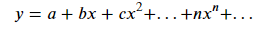



Now Let's understand polynomial regression . We have seen the Linear regression where there was linear relation ship between the dependent and independent variables. The graph that is used to represent linear regression is like 
                    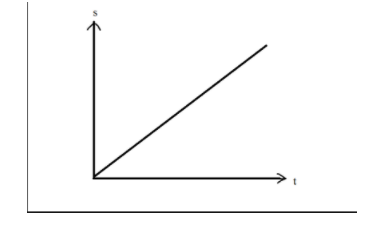

There could be cases where there is no linear relationship between the dependent variable and dependent variable . A graph to show non-linear relationship is given below :
                                        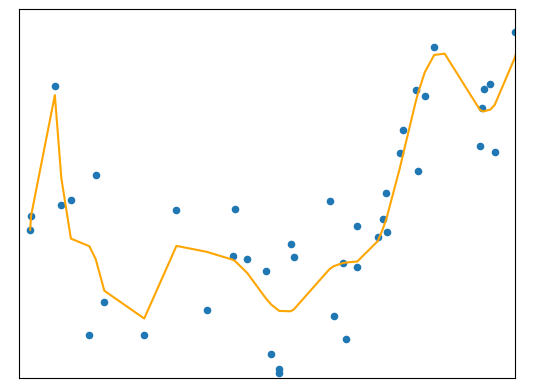
                                        
In these cases Polynomial regression is used .

Matrix representation of a polynomial regression is given below:
                                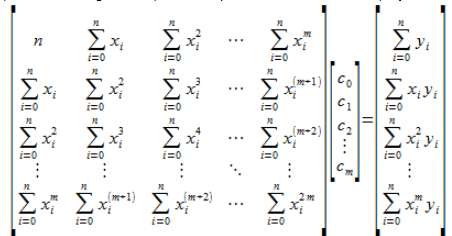
Where m is the _degree_(maximum power of x) of the polynomial and n is the number of observation points.

Note : The above represntation is extension of that we had derived for linear regression (please refer to my earlier blogs)

The above matrix results in the general formula for Polynomial Regression.Earlier, we were able to visualize the calculation of minima because the graph was in three dimensions. But as there are n number of coefficients, it's not possible to create an (n+1)  dimension graph here.

Let's see a simple python implementation for Polynomial Regression:


In [ ]:
#Necessary Imports 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline # this makes sure that the graphs are printed in the jupyter notebook itself  


In [4]:
#importing the dataset
data= pd.read_csv('Position_Salaries.csv') 
# to check if dataset has been read or not 
data.head()  

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# to know the shape i.e. row and columns in data
data.shape

(10, 3)

In [6]:
# to get basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [8]:
# As per the result above the column is not-null column . 
#However let's check it
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [16]:
#Let's takes 'level' as independent variable and 'Salary' as dependent variable
x= data.iloc[:,1:2] # independent variable
y = data.iloc[:,2] # dependent variable


0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

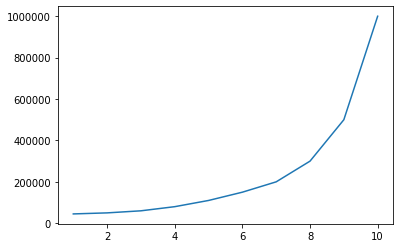

In [30]:
# plot the graph between x and Y to see the relationship. This is another way of finding if the linear regression 
# of degree =1 will be useful model for this kind of data or not .
plt.plot(x,y)

In [18]:
# For the sake of simplicity we are not dividind the data to training and test . Let's make a model using all the data
# this is same as we had done in the Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

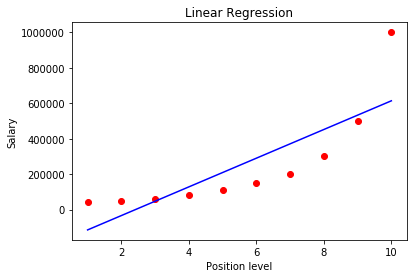

In [19]:
# Now let's check the linear regression model fit to data 
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


We can see the line (linear graph) is not a perfect fit for the data .  Let's bring the polynomial regression in :


In [20]:
# Fitting Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
 #trying to create a 2 degree polynomial equation. It simply squares the x .
poly_reg = PolynomialFeatures(degree = 2) 
# transforming x 
x_poly = poly_reg.fit_transform(x)

# print x and x_poly
print(" value of x")
print(x)
print(" value of x_poly")
print(x_poly)

 value of x
   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
 value of x_poly
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [21]:
# fit the polynomial variable
poly_reg.fit(x_poly, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [22]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression __does not__ talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the __degree of the coefficients__. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression

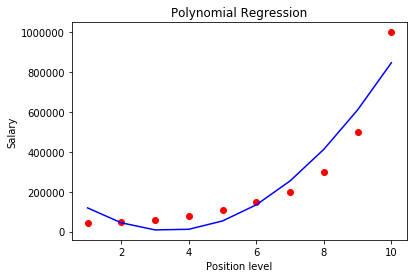

In [23]:
# Visualising the Polynomial Regression results for degree 2
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

It is again seems to be not a good fit for data . We need to try with higher degree . We can get the better model by hit and trial method .

Let's repeat the above step and try to see with degree 4 polynomial

In [28]:
#calculation of error 
from sklearn import metrics
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y, lin_reg_2.predict(x_poly)))
print(metrics.mean_squared_error(y, lin_reg_2.predict(x_poly)))
print(np.sqrt(metrics.mean_squared_error(y, lin_reg_2.predict(x_poly))))

70218.1818181819
6758833333.333336
82212.12400451247


In [24]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
x_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(x_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly1, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

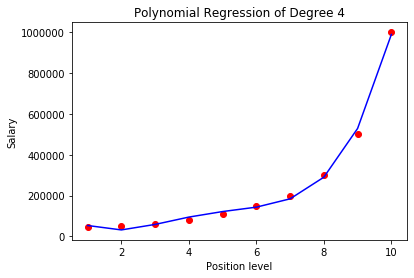

In [25]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [31]:
#calculation of error 
from sklearn import metrics
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y, lin_reg_3.predict(x_poly1)))
print(metrics.mean_squared_error(y, lin_reg_3.predict(x_poly1)))
print(np.sqrt(metrics.mean_squared_error(y, lin_reg_3.predict(x_poly1))))


12681.818181828345
210343822.84381992
14503.234909626883


We can see that error in case of degree 4 polynomial model is less than degree 2 polynomial model. But does that mean that the model created with degree 4 is best model for production . If you see the graph for degree =4, model seems to predict all the point . But this model may not predict the actual data as it is predicting the test data . This may be the case of __Overfitting__ i.e. model is too much mimicking the train data .

If you see the graph of model where degree =1 i.e. linear regression . We can say that model is __Underfitting__ i.e. the trainining data is not well explained by model . 

Again there is a technique of reducing the Overfitting of the model and that is called __Regularization__. To see the different regularization method , we will take up in another blog . 

However Let's understand Bias, Variance and it's tradeoff in above context.

### Bias Variance Tradeoff

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in __under-fitting__.

Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in __over-fitting__  the data.

The below picture summarizes above point:
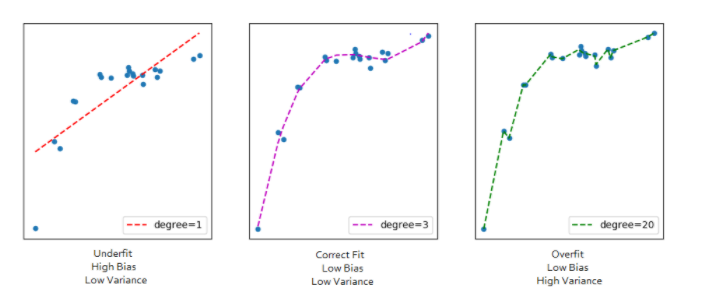


From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.


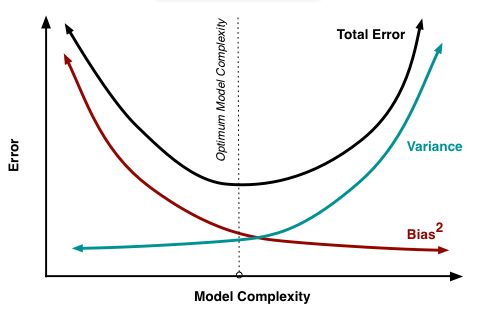

__Let’s end the blog here. Summary of what we have learned in this blog:__
1.	Basic Implementation of Polynomial Regression
2.  Bias Variance Tradeoff





### References: 	
1.	https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
2.  http://scott.fortmann-roe.com/docs/BiasVariance.html



### Follow my blog: https://datasciencewithabhi.blogspot.com/
